# 1. Potential Evapotranspiration from ZAMG data
*A. Kokimova, November 2021, University of Graz*

Data source: ZAMG - https://data.hub.zamg.ac.at

What is done:

- load the station data from ZAMG
- estimate potential evapotranspiration
- plot and store results

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pyet
pyet.show_versions()

Python version: 3.11.3 | packaged by conda-forge | (main, Apr  6 2023, 08:58:31) [Clang 14.0.6 ]
Numpy version: 1.26.2
Pandas version: 2.1.1
xarray version: 2023.7.0
Pyet version: 1.3.0b


## Loading daily data from ZAMG (Messstationen Tagesdaten)

station: Graz Universität 16412

Selected variables:
- globalstrahlung (global radiation), J/cm2 needs to be in MJ/m3d, ZAMG abbreviation - strahl
- arithmetische windgeschwindigkeit (wind speed), m/s, ZAMG abbreviation - vv
- relative feuchte (relative humidity), %, ZAMG abbreviation - rel
- lufttemparatur (air temperature) in 2 m, C, ZAMG abbreviation - t
- lufttemperatur (air temperature) max in 2 m, C, ZAMG abbreviation - tmax
- lufttemperatur (air temperature) min in 2 m, C, ZAMG abbreviation - tmin
- latitute and elevation of a station

In [2]:
#read data
data_16412 = pd.read_csv('data/example_1/klima_daily.csv', index_col=1, parse_dates=True)
data_16412

,station,strahl,rel,t,tmax,tmin,vv
time,,,,,,,
2000-01-01,16412,300.0,80.0,-2.7,0.5,-5.8,1.0
2000-01-02,16412,250.0,86.0,0.2,2.5,-2.1,1.0
2000-01-03,16412,598.0,86.0,0.6,3.6,-2.4,1.0
2000-01-04,16412,619.0,83.0,-0.5,4.5,-5.5,1.0
2000-01-05,16412,463.0,84.0,-0.1,5.4,-5.5,1.0
...,...,...,...,...,...,...,...
2021-11-07,16412,852.0,74.0,8.5,12.2,4.7,1.6
2021-11-08,16412,553.0,78.0,7.5,10.4,4.5,1.6
2021-11-09,16412,902.0,67.0,7.1,11.7,2.4,2.7


## Calculate PET for Graz Universität - 16412

In [3]:
# Convert Glabalstrahlung J/cm2 to MJ/m2 by dividing to 100

meteo = pd.DataFrame({"time":data_16412.index, "tmean":data_16412.t, "tmax":data_16412.tmax, "tmin":data_16412.tmin, "rh":data_16412.rel, 
                      "wind":data_16412.vv, "rs":data_16412.strahl/100})
time, tmean, tmax, tmin, rh, wind, rs = [meteo[col] for col in meteo.columns]

lat = 47.077778*np.pi/180  # Latitude of the meteorological station, converting from degrees to radians
elevation = 367  # meters above sea-level

# Estimate evapotranspiration with four different methods and create a dataframe
pet_df = pyet.calculate_all(tmean, wind, rs, elevation, lat, tmax=tmax,
                                tmin=tmin, rh=rh)

### Plot results

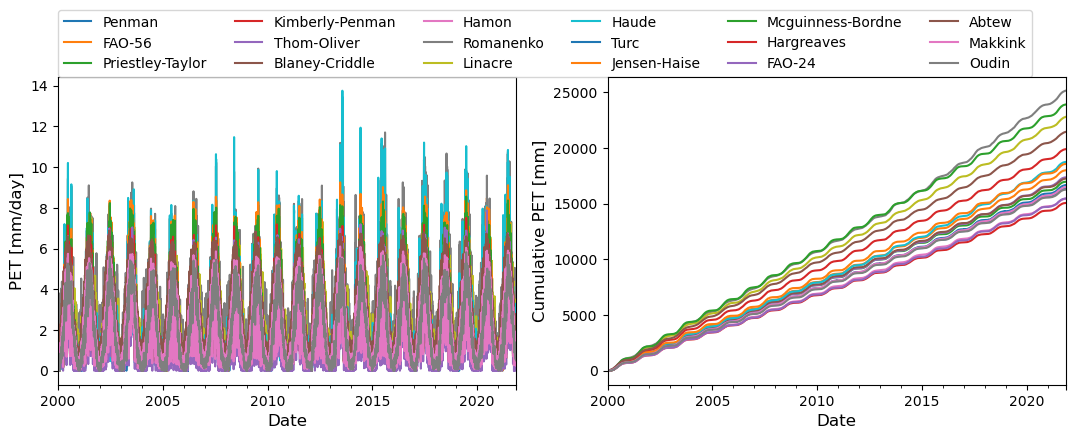

In [4]:
fig, axs = plt.subplots(figsize=(13,4), ncols=2)
pet_df.plot(ax=axs[0])
pet_df.cumsum().plot(ax=axs[1], legend=False)

axs[0].set_ylabel("PET [mm/day]", fontsize=12)
axs[1].set_ylabel("Cumulative PET [mm]", fontsize=12)
axs[0].legend(ncol=6, loc=[0,1.])
for i in (0,1):
    axs[i].set_xlabel("Date", fontsize=12)

### Store results

In [5]:
#plt.savefig("PET_methods.png", dpi=300)
#pet_u.to_csv('../evap_16412.csv')